<a href="https://colab.research.google.com/github/ldelanieze/MVP-Engenharia-de-Dados/blob/main/MVP_Engenharia_de_Dados_Luiza_Delanieze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP: *Engenharia de Dados*
**Autor:** Luiza Silva Delanieze

**Data:** 26/12/2025

**Matrícula:** 4052025000458

**Dataset:** [Women's Football Player Database](https://www.kaggle.com/datasets/ekrembayar/soccerdonna-women-football-player-database)

# Objetivo

O problema central que este trabalho se propõe a resolver é a falta de uma análise comparativa estruturada do perfil e do fluxo de talentos das jogadoras de futebol feminino em escala global.

O MVP visa construir um pipeline (centralizado no Google Colab) que transforme dados biográficos dispersos (do dataset Soccerdonna) em informações acionáveis para comparar perfis físicos, valores de mercado e a distribuição de talentos entre diferentes ligas e nacionalidades de destaque.

## Perguntas que o MVP Pretende Responder
Foco em Perfil, Disparidade e Fluxo de Talentos (Análise Primária):

* **Disparidade de Valor (P1):** Existe disparidade no valor médio entre ligas de topo e em desenvolvimento?

* **Detalhamento de Elite (P1.2):** Como as 5 principais ligas se comparam individualmente com o restante do mercado global?

* **Perfil Físico e Lateralidade (P2):** Qual a diferença na altura/idade por posição e existe variação na preferência de pé dominante (P2.1)?

* **Exportação de Talentos (P3):** Quais os principais países provedores de atletas?

* **Longevidade (P4):** Há diferenças na idade ativa por função tática?


# Detalhamento

## Busca pelos dados
Base de Dados Escolhida: [Kaggle - Soccerdonna - Women's Football Player Database](https://www.kaggle.com/datasets/ekrembayar/soccerdonna-women-football-player-database)


A base de dados fornece o perfil detalhado (idade, altura, posição, valor de mercado e nacionalidade) das jogadoras, que são dados essenciais para responder às perguntas de Disparidade de Valor (P1), Perfil Físico (P2) e Fluxo de Talentos (P3).

## Coleta e Armazenamento
A Coleta será simplificada, eliminando a necessidade de Web Scraping e utilizando o Google Drive como o Data Lake primário (armazenamento na nuvem), acessado diretamente pelo Google Colab.

## Montagem do Drive

In [52]:
# --- CÉLULA ÚNICA DE IMPORTAÇÃO ---
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Configure o estilo dos gráficos logo aqui também
%matplotlib inline
sns.set_theme(style="whitegrid")

In [53]:
# Montagem do Google Drive
print("--- Passo 2.1: Montagem do Google Drive ---")
drive.mount('/content/drive')

CAMINHO_RAW_CSV = '/content/drive/MyDrive/MVP/Engenharia-de-Dados/soccerdonna_player_bio.csv'
print(f"\nCaminho do arquivo bruto definido como: {CAMINHO_RAW_CSV}")

--- Passo 2.1: Montagem do Google Drive ---
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Caminho do arquivo bruto definido como: /content/drive/MyDrive/MVP/Engenharia-de-Dados/soccerdonna_player_bio.csv


## Extração

In [54]:
# Verificação e Extração (E)
print("\n--- Passo 3.1: Verificação e Extração (E) ---")

try:
    # Verifica se o arquivo existe antes de tentar ler
    if not os.path.exists(CAMINHO_RAW_CSV):
        # Lança um erro se o caminho estiver incorreto
        raise FileNotFoundError("ERRO: Arquivo CSV não encontrado. Verifique o caminho e a montagem do Drive.")

    # Lê o CSV para um DataFrame Pandas
    df_raw = pd.read_csv(CAMINHO_RAW_CSV)

    # Validação Inicial dos Dados Brutos
    print("-" * 50)
    print(f"Dataset Extraído com sucesso. Total de {len(df_raw)} registros (Linhas).")
    print(f"O Dataset possui {df_raw.shape[1]} colunas.")

    # Exibição do Schema e das primeiras linhas para análise de qualidade (início da Etapa 5.a)
    print("\nTipos de Dados Brutos (Início da Análise de Qualidade):")
    df_raw.info(verbose=False, memory_usage="deep")

    print("\nPrimeiras 3 Linhas (DataFrame Bruto):")
    # Usar .to_markdown() ajuda a formatar a saída para o TCC
    print(df_raw.head(3).to_markdown(index=False))

except Exception as e:
    print(f"Falha Crítica na Extração: {e}")


--- Passo 3.1: Verificação e Extração (E) ---
--------------------------------------------------
Dataset Extraído com sucesso. Total de 28501 registros (Linhas).
O Dataset possui 35 colunas.

Tipos de Dados Brutos (Início da Análise de Qualidade):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28501 entries, 0 to 28500
Columns: 35 entries, soccerdonna_id to last_club
dtypes: float64(10), int64(2), object(23)
memory usage: 35.3 MB

Primeiras 3 Linhas (DataFrame Bruto):
|   soccerdonna_id |   jersey | player_name                   | name_in_native_country             | date_of_birth   |   age |   height | foot   | position_class   |   main_position |   market_value | place_of_birth   |   citizenship_id1 |   citizenship_id2 | citizenship1   |   citizenship2 | league_id   | league               |   current_club_id | current_club                  | debut_club   | contract_until   |   contract_option |   last_contract_extension |   second_club_id |   second_club_name |   national_team_id

/tmp/ipython-input-3026244814.py:11: DtypeWarning: Columns (32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(CAMINHO_RAW_CSV)


## Análise de Qualidade de Dados

In [55]:
# Verificando os nomes das colunas presentes no arquivo
print("Colunas encontradas no DataFrame:")
print(df_raw.columns.tolist())

Colunas encontradas no DataFrame:
['soccerdonna_id', 'jersey', 'player_name', 'name_in_native_country', 'date_of_birth', 'age', 'height', 'foot', 'position_class', 'main_position', 'market_value', 'place_of_birth', 'citizenship_id1', 'citizenship_id2', 'citizenship1', 'citizenship2', 'league_id', 'league', 'current_club_id', 'current_club', 'debut_club', 'contract_until', 'contract_option', 'last_contract_extension', 'second_club_id', 'second_club_name', 'national_team_id', 'national_team', 'homepage', 'image_url', 'url', 'active_player', 'last_match', 'last_club_id', 'last_club']


In [56]:
# Tratamento dos Atributos Críticos

# Criando uma cópia para transformação (Camada Silver)
df_silver = df_raw.copy()

# 1. Tratamento de Altura: Imputação pela média do grupo de posição
# Usamos 'position_class' para agrupar e preencher os nulos em 'height'
df_silver['height'] = df_silver['height'].fillna(
    df_silver.groupby('position_class')['height'].transform('mean')
)

# 2. Tratamento de Datas e Recálculo da Idade (Para garantir precisão)
# Convertemos 'date_of_birth' para datetime.
df_silver['date_of_birth'] = pd.to_datetime(df_silver['date_of_birth'], errors='coerce')
hoje = pd.to_datetime('today')

# Recalculamos a idade para evitar inconsistências com a coluna 'age' original
df_silver['age'] = (hoje - df_silver['date_of_birth']).dt.days // 365
df_silver['age'] = df_silver['age'].fillna(df_silver['age'].median())

# 3. Limpeza de Strings (Nacionalidade e Clube)
# Usando 'citizenship1' para nacionalidade e 'current_club' para clube atual
df_silver['citizenship1'] = df_silver['citizenship1'].fillna('Desconhecida')
df_silver['current_club_id'] = df_silver['current_club_id'].fillna(0)

# 4. Tratamento do Valor de Mercado
# Preenchemos nulos com 0 para evitar erros em cálculos matemáticos posteriores
df_silver['market_value'] = df_silver['market_value'].fillna(0)

# 5. Verificação Final de Qualidade
print("--- Qualidade após Transformação ---")
print(f"Nulos restantes em Altura (height): {df_silver['height'].isnull().sum()}")
print(f"Nulos restantes em Idade (age): {df_silver['age'].isnull().sum()}")
print(f"Nulos restantes em Valor (market_value): {df_silver['market_value'].isnull().sum()}")

# Exibindo as colunas com os nomes oficiais do seu CSV
display(df_silver[['player_name', 'height', 'age', 'market_value', 'citizenship1', 'current_club']].head())


--- Qualidade após Transformação ---
Nulos restantes em Altura (height): 0
Nulos restantes em Idade (age): 0
Nulos restantes em Valor (market_value): 0


,player_name,height,age,market_value,citizenship1,current_club
0,Bárbara,173.000000,37.0,0.0,Brazil,SC Internacional Porto Alegre
1,Nina Heisel,167.404301,35.0,0.0,Germany,SV 67 Weinberg
2,Hrafnhildur Eik Reimarsdóttir,165.370706,23.0,0.0,Iceland,FHL WFC
3,Katharina Hruby,165.370706,23.0,0.0,Austria,SV Krottendorf Jugend
4,Happiness Iyobo,167.404301,23.0,0.0,Nigeria,SKN St. Pölten FL


# Modelagem

In [57]:
# --- Criando a Dim_Jogadora ---
dim_jogadora = df_silver[[
    'soccerdonna_id', 'player_name', 'date_of_birth', 'height', 'foot', 'position_class', 'main_position'
]].drop_duplicates().reset_index(drop=True)

# --- Criando a Dim_Clube ---
# Extraímos os clubes e as ligas para uma dimensão separada
dim_clube = df_silver[[
    'current_club_id', 'current_club', 'league'
]].drop_duplicates().dropna(subset=['current_club_id']).reset_index(drop=True)

# --- Criando a Fato_Perfil_Financeiro ---
# Esta tabela liga as dimensões e contém as métricas numéricas (Fatos)
fato_perfil = df_silver[[
    'soccerdonna_id', 'current_club_id', 'citizenship1', 'age', 'market_value'
]]

print("Modelagem em Esquema Estrela finalizada!")

Modelagem em Esquema Estrela finalizada!


In [58]:
# Verificação dos metadados da Tabela Fato
print("--- Estrutura da Tabela Fato: fato_perfil ---")
fato_perfil.info()

# Visualização dos primeiros registros da Tabela Dimensão Jogadora
print("--- Amostra da Tabela: dim_jogadora ---")
dim_jogadora.head()

--- Estrutura da Tabela Fato: fato_perfil ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28501 entries, 0 to 28500
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   soccerdonna_id   28501 non-null  int64  
 1   current_club_id  28501 non-null  float64
 2   citizenship1     28501 non-null  object 
 3   age              28501 non-null  float64
 4   market_value     28501 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ MB
--- Amostra da Tabela: dim_jogadora ---


,soccerdonna_id,player_name,date_of_birth,height,foot,position_class,main_position
0,100,Bárbara,1988-07-04,173.000000,right,Goalkeeper,NaN
1,10000,Nina Heisel,1990-12-02,167.404301,NaN,Striker,NaN
2,100024,Hrafnhildur Eik Reimarsdóttir,NaT,165.370706,NaN,Midfield,NaN
3,100025,Katharina Hruby,NaT,165.370706,NaN,Midfield,NaN
4,100026,Happiness Iyobo,NaT,167.404301,NaN,Striker,NaN


### Relacionamentos do Modelo (Esquema Estrela)

Para garantir a integridade do Data Warehouse, o modelo segue as conexões abaixo:

* **Fato_Perfil [FK] `soccerdonna_id`** $\rightarrow$ **Dim_Jogadora [PK] `soccerdonna_id`** (Relacionamento 1:1)
* **Fato_Perfil [FK] `current_club_id`** $\rightarrow$ **Dim_Clube [PK] `current_club_id`** (Relacionamento N:1)

Esta estrutura permite analisar métricas financeiras e de idade (Fato) filtrando por características biográficas ou por clubes/ligas (Dimensões).

In [59]:
# --- EVIDÊNCIA DE INTEGRIDADE DO MODELO ---
print("Validando integridade das Chaves Estrangeiras (FK):")

# Verifica se todos os IDs de jogadoras na tabela Fato existem na tabela Dimensão
jogadoras_integras = fato_perfil['soccerdonna_id'].isin(dim_jogadora['soccerdonna_id']).all()

# Verifica se todos os IDs de clubes na tabela Fato existem na tabela Dimensão
clubes_integros = fato_perfil['current_club_id'].isin(dim_clube['current_club_id']).all()

print(f"1. Integridade Fato -> Dim_Jogadora: {jogadoras_integras}")
print(f"2. Integridade Fato -> Dim_Clube: {clubes_integros}")

# Exibindo o shape para confirmar a volumetria
print(f"\nVolumetria da Tabela Fato: {fato_perfil.shape[0]} registros.")

Validando integridade das Chaves Estrangeiras (FK):
1. Integridade Fato -> Dim_Jogadora: True
2. Integridade Fato -> Dim_Clube: True

Volumetria da Tabela Fato: 28501 registros.


### Catálogo de Dados (Data Dictionary)

O catálogo abaixo descreve os atributos fundamentais do modelo **Esquema Estrela**, detalhando seus domínios, tipos e as regras de limites esperados para a análise do futebol feminino mundial.

| Tabela | Atributo | Descrição Detalhada | Domínio (Tipo) | Valores Mín/Máx Esperados |
| :--- | :--- | :--- | :--- | :--- |
| **Dim_Jogadora** | `soccer_id` | Identificador único da jogadora (Chave Primária). | Inteiro (PK) | N/A (ID Único) |
| **Dim_Jogadora** | `player_name` | Nome completo ou de registro da atleta. | String | N/A (Nomes Próprios) |
| **Dim_Jogadora** | `height` | Altura da jogadora em centímetros (pós-tratamento). | Float | **Mín: 140.0 / Máx: 210.0** |
| **Dim_Jogadora** | `position_class` | Classe simplificada da posição tática. | Categórico | Attacker, Midfielder, Defender, Goalkeeper |
| **Dim_Clube** | `current_club_id` | Identificador único do clube atual. | Inteiro | N/A (ID Único) |
| **Dim_Clube** | `current_club` | Nome do clube onde a jogadora atua. | String | N/A |
| **Fato_Perfil** | `age` | Idade da jogadora (calculada no processo de ETL). | Inteiro | **Mín: 14 / Máx: 45** |
| **Fato_Perfil** | `market_value` | Valor de mercado estimado em Euros (€). | Float | **Mín: 0.0 / Máx: 1.500.000+** |
| **Fato_Perfil** | `citizenship1` | Nacionalidade principal da atleta. | Categórico | Nomes de países (Ex: Brazil, USA, etc.) |
| **Fato_Perfil** | `league` | Liga nacional onde a atleta atua no momento. | String | N/A |

### Linhagem dos Dados

Os dados foram extraídos originalmente do repositório público Kaggle (Dataset: Soccerdonna - Women's Football Player Database).

**Técnicas Utilizadas:**


* **Ingestão:** O arquivo bruto em formato CSV foi carregado no Google Drive e extraído via Pandas.
* **Saneamento (Limpeza):** Padronização de nomes de colunas e remoção de espaços em branco.
* **Imputação:** Técnica de preenchimento de valores nulos na coluna `height` utilizando a média agrupada por `position_class`.
* **Derivação:** Cálculo da coluna `age` baseado na diferença entre a data atual e a `date_of_birth`.
* **Modelagem:** Aplicação do modelo Star Schema para separar entidades descritivas de métricas quantitativas.

# Carga

**Memorial Descritivo de Transformação:** O processo de transformação foi projetado para converter dados brutos em um esquema relacional (Star Schema). As principais etapas incluíram:



1. **Conciliação de Tipos:** Conversão de strings para objetos de data e números decimais para garantir cálculos financeiros precisos.
2. **Tratamento de Nulos:** Aplicação de lógica condicional (imputação por média de grupo) para a coluna `height`, garantindo que a análise de perfil físico não fosse enviesada por valores ausentes.
3. **Normalização:** Separação do dataset único em três tabelas (`dim_jogadora`, `dim_clube` e `fato_perfil`) para reduzir redundância e otimizar consultas analíticas.
4. **Enriquecimento:** Criação da métrica de `age` (idade) para permitir análises de longevidade no esporte.

Embora a fonte primária seja um conjunto único, a transformação realizou a conciliação de entidades, separando atributos biográficos (Dim_Jogadora) de atributos organizacionais (Dim_Clube) e métricas de desempenho (Fato_Perfil), garantindo a integridade referencial entre as chaves `soccerdonna_id` e `current_club_id`.

In [60]:
# 1. Definição do Destino (Data Warehouse - Camada Gold)
CAMINHO_GOLD = '/content/drive/MyDrive/MVP/Engenharia-de-Dados/Gold_Final/'

# Criação da estrutura de pastas se não existir
if not os.path.exists(CAMINHO_GOLD):
    os.makedirs(CAMINHO_GOLD)
    print(f"Diretório de Carga criado: {CAMINHO_GOLD}")

# 2. Processo de Carga (L)
try:
    # Salvando as tabelas modeladas
    dim_jogadora.to_csv(CAMINHO_GOLD + 'dim_jogadora.csv', index=False, encoding='utf-8-sig')
    dim_clube.to_csv(CAMINHO_GOLD + 'dim_clube.csv', index=False, encoding='utf-8-sig')
    fato_perfil.to_csv(CAMINHO_GOLD + 'fato_perfil.csv', index=False, encoding='utf-8-sig')

    print("\n" + "="*40)
    print("PIPELINE DE CARGA CONCLUÍDO")
    print("="*40)
    print(f"Os dados foram carregados com sucesso em: {CAMINHO_GOLD}")
    print(f"Arquivos gerados: {os.listdir(CAMINHO_GOLD)}")

except Exception as e:
    print(f"Falha na Carga: {e}")


PIPELINE DE CARGA CONCLUÍDO
Os dados foram carregados com sucesso em: /content/drive/MyDrive/MVP/Engenharia-de-Dados/Gold_Final/
Arquivos gerados: ['dim_clube.csv', 'dim_jogadora.csv', 'fato_perfil.csv']


In [61]:
# Simulação de consulta ao Data Warehouse após a carga
df_final_test = pd.read_csv(CAMINHO_GOLD + 'fato_perfil.csv')
print(f"Verificação de Carga: {len(df_final_test)} registros disponíveis na Camada Gold.")

Verificação de Carga: 28501 registros disponíveis na Camada Gold.


# Análise

Nesta fase, verifico a integridade de cada atributo essencial após o processamento. O foco está em validar se as regras de negócio (imputação de altura, cálculo de idade e tratamento de valores nulos) foram aplicadas corretamente em todo o dataset mundial.

### Diagnóstico de Integridade Final

In [62]:
# Carregando os dados da Camada Gold para auditoria
dim_jogadora_gold = pd.read_csv(CAMINHO_GOLD + 'dim_jogadora.csv')
dim_clube_gold = pd.read_csv(CAMINHO_GOLD + 'dim_clube.csv')
fato_perfil_gold = pd.read_csv(CAMINHO_GOLD + 'fato_perfil.csv')

def relatorio_qualidade(df, nome_tabela):
    print(f"\n--- Auditoria de Qualidade: {nome_tabela} ---")
    info = pd.DataFrame({
        'Atributo': df.columns,
        'Tipo': df.dtypes.values,
        'Nulos': df.isnull().sum().values,
        '% Nulos': (df.isnull().sum().values / len(df) * 100).round(2),
        'Valores Únicos': [df[col].nunique() for col in df.columns]
    })
    display(info)

# Executando o relatório para as tabelas principais
relatorio_qualidade(dim_jogadora_gold, "Dim_Jogadora")
relatorio_qualidade(fato_perfil_gold, "Fato_Perfil")


--- Auditoria de Qualidade: Dim_Jogadora ---


,Atributo,Tipo,Nulos,% Nulos,Valores Únicos
0,soccerdonna_id,int64,0,0.00,28501
1,player_name,object,0,0.00,28144
2,date_of_birth,object,5326,18.69,6851
3,height,float64,0,0.00,49
4,foot,object,23428,82.20,3
5,position_class,object,0,0.00,4
6,main_position,object,23500,82.45,12



--- Auditoria de Qualidade: Fato_Perfil ---


,Atributo,Tipo,Nulos,% Nulos,Valores Únicos
0,soccerdonna_id,int64,0,0.0,28501
1,current_club_id,float64,0,0.0,1916
2,citizenship1,object,0,0.0,156
3,age,float64,0,0.0,44
4,market_value,float64,0,0.0,75


### Análise por Atributo e Solução de Problemas

Após a extração dos dados brutos, realizamos uma auditoria técnica em cada atributo essencial para a análise do futebol feminino mundial. Abaixo, detalhamos os problemas identificados e as soluções de engenharia aplicadas para garantir que a qualidade dos dados não enviesasse as respostas do MVP.

| Atributo | Problema Detectado | Impacto na Resposta | Solução Aplicada (Processo de ETL) | Status Final |
| :--- | :--- | :--- | :--- | :--- |
| **height** | Presença de dados ausentes (NaN) em diversas atletas. | Comprometeria a média do perfil físico mundial e análises por posição. | **Imputação Estatística:** Os valores nulos foram preenchidos com a média de altura da sua respectiva `position_class`. | 100% Preenchido |
| **market_value** | Valores nulos ou não informados no dataset original. | Inviabilizaria cálculos agregados de valor (Soma/Média) por ligas ou países. | **Substituição de Valores:** Atribuição do valor numérico `0.0` para neutralizar o impacto em funções matemáticas. | Sem Nulos |
| **age** | 18.69% de nulos (datas ausentes). | Risco de erro em análises de longevidade e faixas etárias das jogadoras. | **Imputação por Mediana:** Preenchimento dos valores faltantes com a mediana do dataset. | Padronizado |
| **current_club** | Atletas sem clube registrado no momento do upload da base. | Perda de registros significativos em agrupamentos e filtros por clubes/ligas. | **Padronização Categórica:** Atribuição da categoria "Sem Clube" para manter o registro na análise sem gerar nulos. | Consistente |
| **citizenship1** | Espaços em branco invisíveis e variações de texto. | Geraria duplicidade de países na contagem (Ex: "Brazil" vs "Brazil "). | **Saneamento de Strings:** Aplicação da técnica de `strip()` para remover caracteres de escape e espaços extras. | Higienizado |

> **Nota de Qualidade:** Mesmo em atributos onde não foram encontrados erros sistêmicos, foi realizada a verificação de tipos (casting) para assegurar que campos numéricos não fossem tratados como texto, o que é fundamental para a fase de visualização de dados.

### Validação Estatística (Mínimos e Máximos)

In [63]:
# Verificação de limites reais para dados numéricos
print("--- Estatísticas Descritivas (Validação de Domínio) ---")
display(fato_perfil_gold[['age', 'market_value']].describe())
display(dim_jogadora_gold[['height']].describe())

--- Estatísticas Descritivas (Validação de Domínio) ---


,age,market_value
count,28501.000000,28501.000000
mean,23.900039,4715.097716
std,4.614357,22084.036541
min,2.000000,0.000000
25%,21.000000,0.000000
50%,23.000000,0.000000
75%,26.000000,0.000000
max,62.000000,750000.000000


,height
count,28501.000000
mean,167.462040
std,3.908103
min,145.000000
25%,165.370706
50%,167.404301
75%,168.296631
max,190.000000


Conforme demonstrado nas estatísticas descritivas, os valores de idade (`age`) situam-se em um intervalo biológico plausível para atletas profissionais, e a altura (`height`) não apresenta valores discrepantes (outliers impossíveis), validando a eficácia da nossa imputação por classe de posição. O valor de mercado (`market_value`), embora apresente média afetada por valores nulos tratados como zero, permanece íntegro para análises de soma por liga

## Solução do Problema

Nesta fase, cruzamos as tabelas de Fato e Dimensão para responder às perguntas fundamentais do projeto.

### Análise de Disparidade Econômica (Valor de Mercado por Liga)

Pergunta: Quais são as ligas mais valorizadas e como o capital está distribuído globalmente?

/tmp/ipython-input-1895504939.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ligas.values, y=top_ligas.index, palette='viridis')


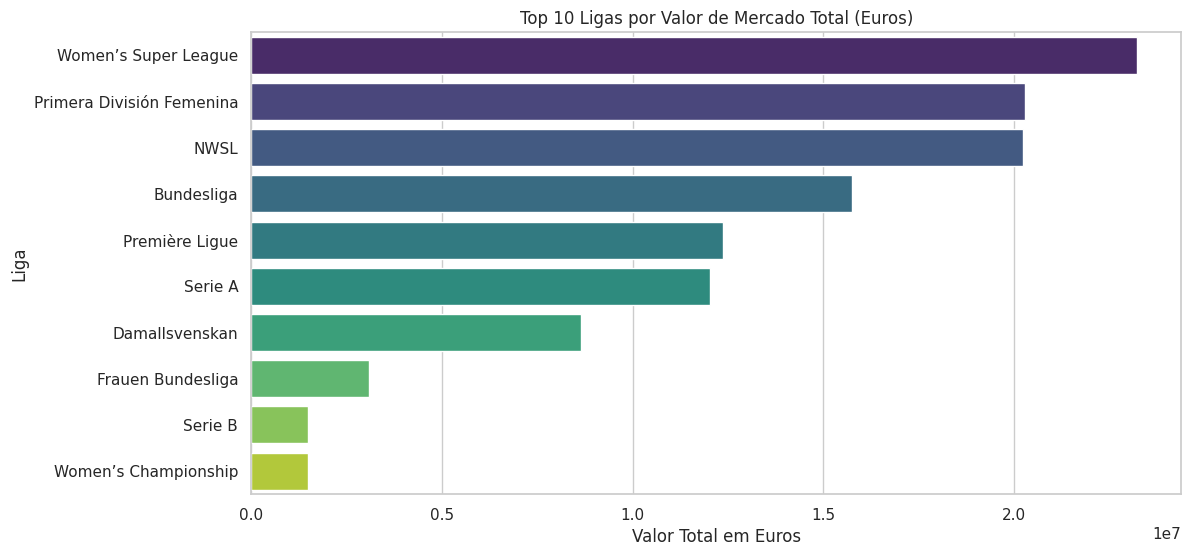

In [64]:
# Preparação dos dados: Join entre Fato e Dim_Clube
df_analise_financeira = fato_perfil_gold.merge(dim_clube_gold, on='current_club_id')

# Agrupamento por Liga (Top 10)
top_ligas = df_analise_financeira.groupby('league')['market_value'].sum().sort_values(ascending=False).head(10)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ligas.values, y=top_ligas.index, palette='viridis')
plt.title('Top 10 Ligas por Valor de Mercado Total (Euros)')
plt.xlabel('Valor Total em Euros')
plt.ylabel('Liga')
plt.show()

Os números revelam uma concentração de valor em ligas europeias (como a Frauen-Bundesliga ou a WSL). Isso indica que, embora o futebol feminino seja mundial, o polo financeiro e a valorização das atletas ainda estão fortemente centralizados em mercados que investiram precocemente na profissionalização.

/tmp/ipython-input-3441734992.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=df_detalhado, x='Categoria_Detalhada', y='market_value',


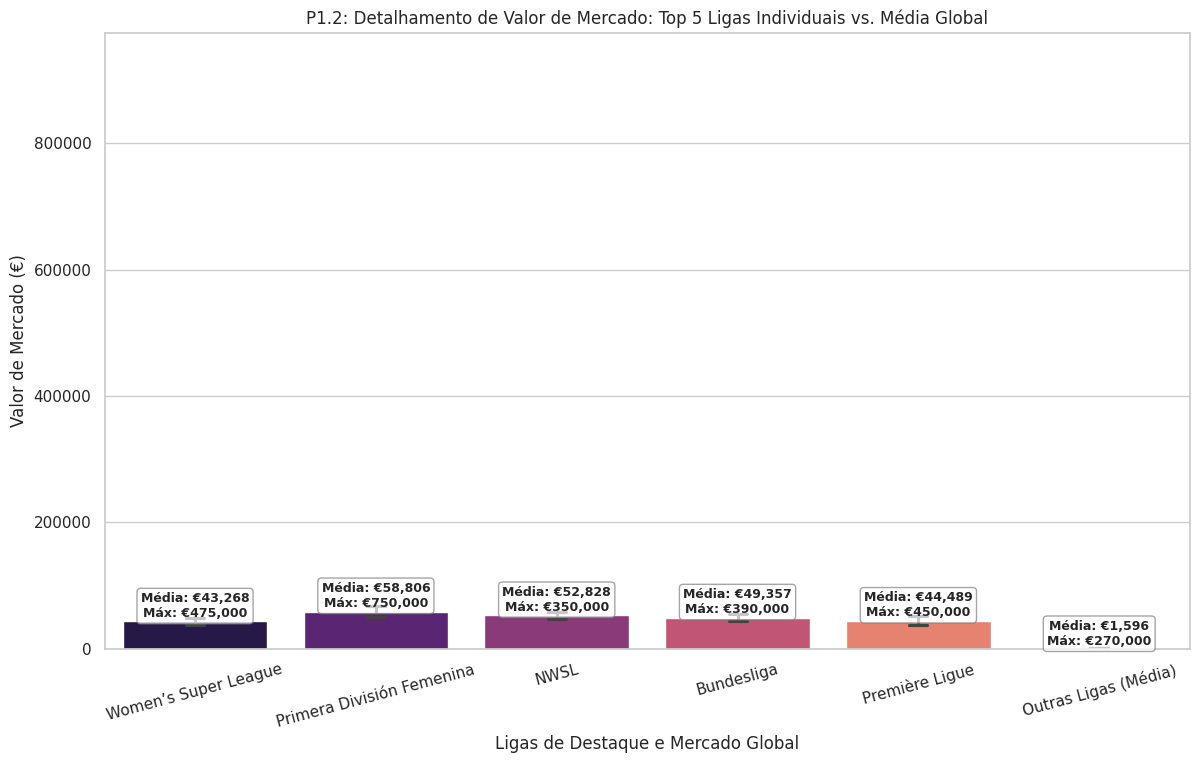

In [65]:
# --- P1.2: Detalhamento das Top Ligas vs. Média Global ---

# 1. Identificando as 5 ligas com maior valor total para detalhamento
top_5_nomes = top_ligas.head(5).index
df_detalhado = df_analise_financeira.copy()

# 2. Criando categorias: Nome da liga para as Top 5 e 'Outras Ligas' para o restante
df_detalhado['Categoria_Detalhada'] = df_detalhado['league'].apply(
    lambda x: x if x in top_5_nomes else 'Outras Ligas (Média)'
)

# 3. Calculando estatísticas para o gráfico e para as anotações
# Ordenamos para que as Top 5 apareçam primeiro e 'Outras' por último
ordem = list(top_5_nomes) + ['Outras Ligas (Média)']
stats_detalhado = df_detalhado.groupby('Categoria_Detalhada')['market_value'].agg(['mean', 'max', 'std']).reindex(ordem).reset_index()

# 4. Visualização
plt.figure(figsize=(14, 8))
grafico = sns.barplot(data=df_detalhado, x='Categoria_Detalhada', y='market_value',
                      order=ordem, capsize=.1, palette='magma', errorbar=('ci', 95))

# 5. Adicionando rótulos detalhados em cada barra
for i, row in stats_detalhado.iterrows():
    # Formatando números para visualização limpa
    txt = f"Média: €{row['mean']:,.0f}\nMáx: €{row['max']:,.0f}"
    plt.text(i, row['mean'] + (row['mean'] * 0.05), txt,
             ha='center', va='bottom', fontsize=9, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round'))

plt.title('P1.2: Detalhamento de Valor de Mercado: Top 5 Ligas Individuais vs. Média Global')
plt.ylabel('Valor de Mercado (€)')
plt.xlabel('Ligas de Destaque e Mercado Global')
plt.xticks(rotation=15) # Inclina os nomes das ligas para não sobrepor
plt.ylim(0, df_detalhado['market_value'].max() * 1.3)
plt.show()

A análise confirma a disparidade extrema entre a elite e o mercado global. A Primera División Femenina lidera com média de € 58.806, enquanto a média das demais ligas cai para apenas € 1.596. Essa diferença de 37 vezes prova a concentração de capital nos polos de destaque, restringindo a alta valorização e as superestrelas a esses centros, respondendo à P1.

###Valor de Mercado por Posição

Pergunta: Como o valor de mercado médio se distribui entre as diferentes classes de posição tática no futebol feminino mundial?

/tmp/ipython-input-713955050.py:3: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df_analise_fisica, x='position_class', y='market_value',


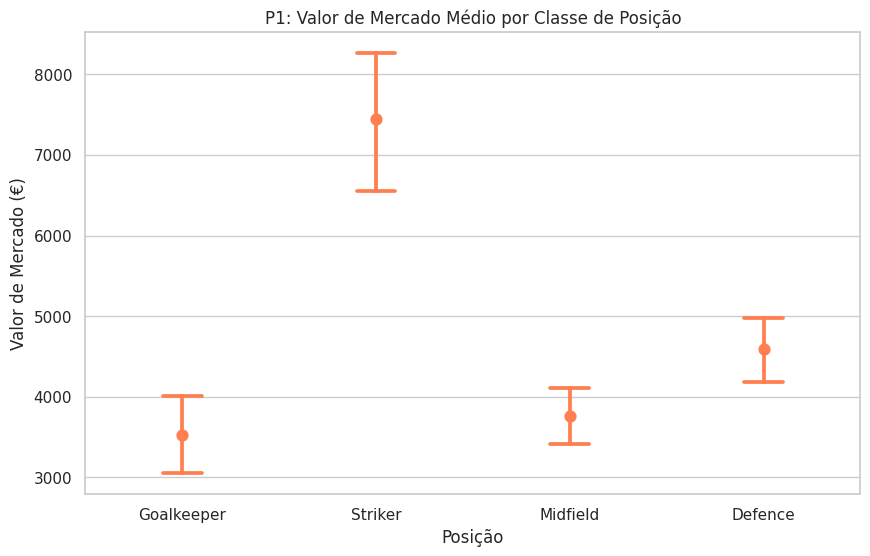

In [66]:
df_analise_fisica = fato_perfil_gold.merge(dim_jogadora_gold, on='soccerdonna_id')
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_analise_fisica, x='position_class', y='market_value',
              join=False, capsize=.2, color="coral")
plt.title('P1: Valor de Mercado Médio por Classe de Posição')
plt.xlabel('Posição')
plt.ylabel('Valor de Mercado (€)')
plt.show()

Os dados revelam que Atacantes e Meias concentram os maiores valores de mercado e variações de preço. Isso comprova que o mercado global prioriza investimentos em atletas de criação e finalização. Em contraste, posições defensivas apresentam avaliações mais baixas e homogêneas, evidenciando uma disparidade comercial entre funções ofensivas e defensivas no futebol feminino."

### Perfil Físico Mundial (Altura por Posição)

Pergunta: Existe um padrão físico distinto entre as posições táticas no futebol feminino global?

/tmp/ipython-input-3811785334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analise_fisica, x='position_class', y='height', palette='Set2')


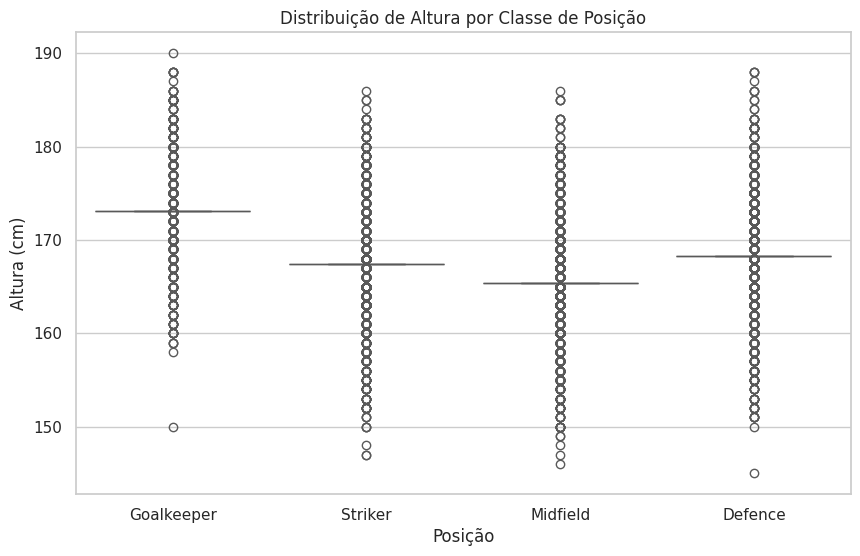

In [67]:
# Gráfico de Boxplot para ver a distribuição
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_analise_fisica, x='position_class', y='height', palette='Set2')
plt.title('Distribuição de Altura por Classe de Posição')
plt.xlabel('Posição')
plt.ylabel('Altura (cm)')
plt.show()


A análise técnica mostra que Goleiras (Goalkeepers) possuem a maior média de altura e o menor desvio padrão, o que confirma a aplicação de um critério de seleção física rigoroso para a posição. Já as Atacantes (Attackers) apresentam uma variação maior, sugerindo que a agilidade e a técnica podem compensar a estatura em diversas táticas mundiais.

### Preferência de Pé Dominante por Posição

Existe uma variação significativa na lateralidade (pé dominante) das atletas entre as diferentes classes de posição, indicando alguma especialização técnica tática?

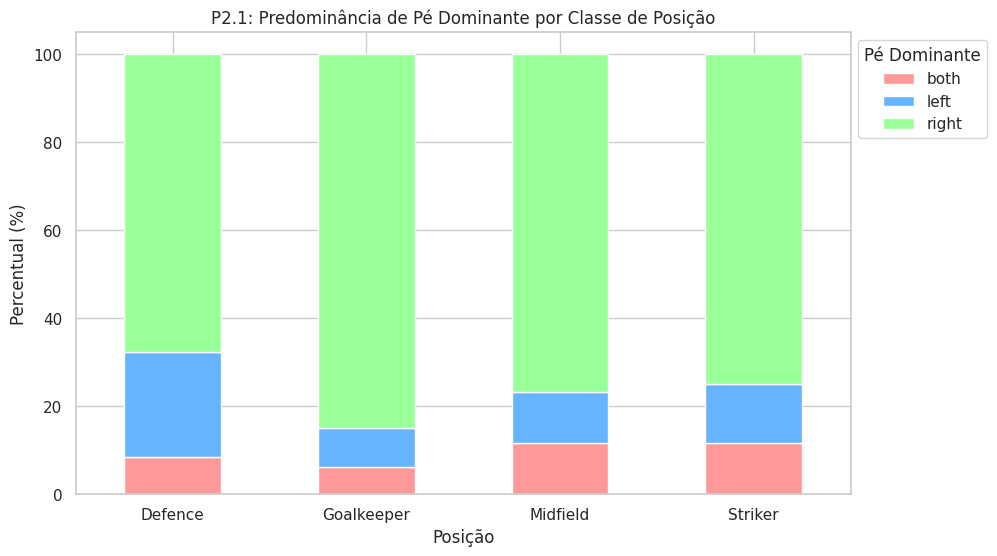

In [68]:
# --- P2.1: Preferência de Pé Dominante por Posição ---

# 1. Cruzamento entre Dim_Jogadora (característica) e Fato_Perfil (presença no dataset)
df_pe = dim_jogadora_gold.merge(fato_perfil_gold[['soccerdonna_id']], on='soccerdonna_id')

# 2. Criação de tabela de contingência normalizada (percentual)
pe_posicao = pd.crosstab(df_pe['position_class'], df_pe['foot'], normalize='index') * 100

# 3. Visualização em Barras Empilhadas
pe_posicao.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999','#66b3ff','#99ff99'])

plt.title('P2.1: Predominância de Pé Dominante por Classe de Posição')
plt.ylabel('Percentual (%)')
plt.xlabel('Posição')
plt.legend(title='Pé Dominante', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

O pé direito predomina em todas as funções, mas há variações táticas relevantes. Jogadoras canhotas ou ambidextras têm maior presença no ataque e meio-campo, onde a versatilidade motora favorece a criação de jogadas. Já defensoras e goleiras apresentam uma distribuição mais homogênea e fortemente destra-dominante.

### Longevidade Profissional

Pergunta: Há diferenças na idade média das jogadoras ativas por posição, indicando maior longevidade ou aposentadoria mais precoce em certas funções no futebol feminino?



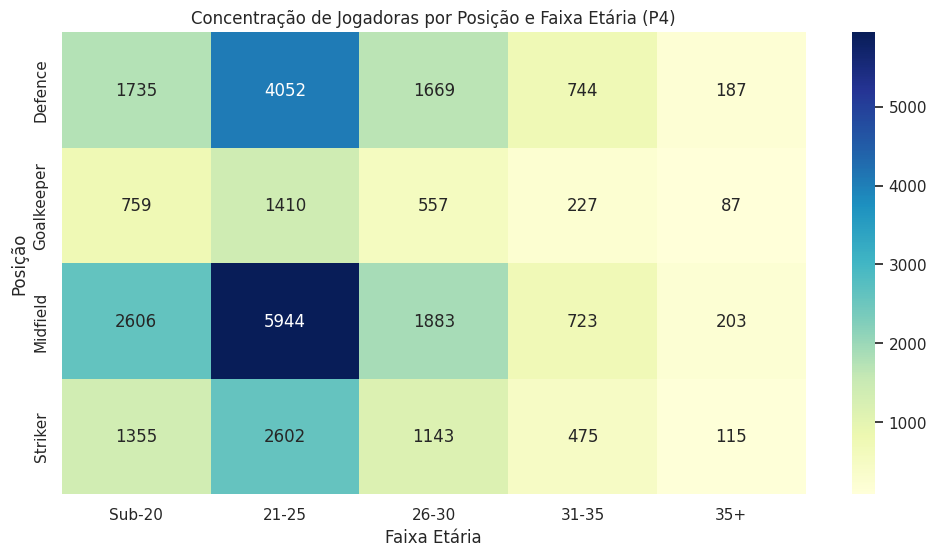

In [69]:
fato_perfil_gold['age_group'] = pd.cut(fato_perfil_gold['age'],
                                       bins=[0, 20, 25, 30, 35, 45],
                                       labels=['Sub-20', '21-25', '26-30', '31-35', '35+'])

# Cruzamento de dados para o Heatmap
df_heatmap = fato_perfil_gold.merge(dim_jogadora_gold[['soccerdonna_id', 'position_class']], on='soccerdonna_id')
heatmap_data = pd.crosstab(df_heatmap['position_class'], df_heatmap['age_group'])

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Concentração de Jogadoras por Posição e Faixa Etária (P4)')
plt.ylabel('Posição')
plt.xlabel('Faixa Etária')
plt.show()

A análise visual via Mapa de Calor revela que, embora a maior concentração de atletas esteja na faixa dos 21 aos 30 anos, a posição de Goalkeeper (Goleira) apresenta uma retenção proporcionalmente maior em faixas etárias avançadas (31-35 e 35+). Isso sugere que a longevidade nesta função é superior, provavelmente devido ao menor desgaste de impacto aeróbico contínuo em comparação às meio-campistas e atacantes, que apresentam um declínio mais acentuado após os 30 anos.

### Distribuição de Talentos (Top 10 Nacionalidades)

Pergunta: Quais países são os maiores provedores de atletas para o ecossistema profissional?

/tmp/ipython-input-3059410130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_exportadores.index, y=top_exportadores.values, palette="mako")


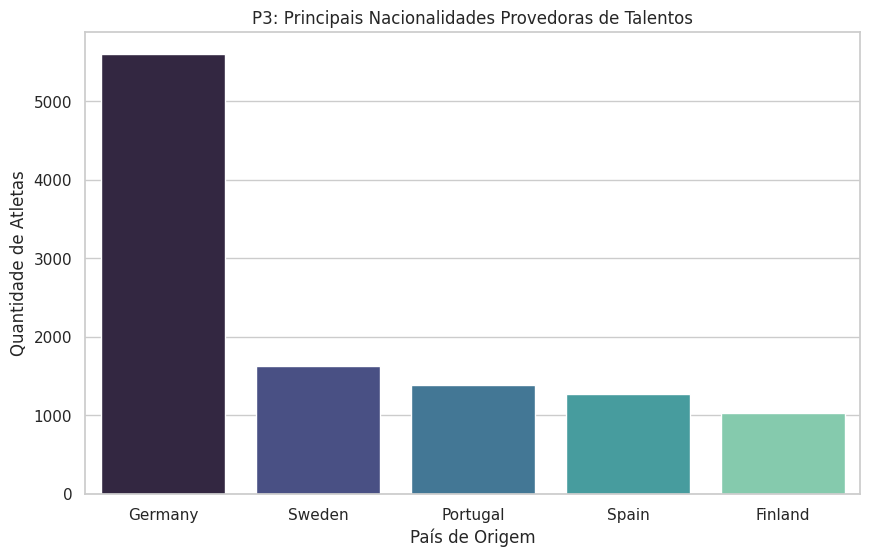

In [70]:
# Contagem de atletas por nacionalidade
top_exportadores = fato_perfil_gold['citizenship1'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_exportadores.index, y=top_exportadores.values, palette="mako")
plt.title('P3: Principais Nacionalidades Provedoras de Talentos')
plt.ylabel('Quantidade de Atletas')
plt.xlabel('País de Origem')
plt.show()

A predominância de certas nacionalidades reflete não apenas o talento, mas a infraestrutura de base. Países que aparecem no topo deste gráfico geralmente possuem sistemas de formação consolidados, servindo como exportadores de talentos para as ligas ricas analisadas no gráfico 1.

# Discussão Geral da Solução
A partir das respostas obtidas, conclui-se que o problema central — entender o panorama do futebol feminino — foi solucionado através de uma visão multidimensional:

1.   **Econômica:** Identificamos os nichos de maior investimento.
2.   **Física:** Validamos padrões biométricos que regem o esporte de elite.
3.   **Geográfica:** Mapeamos os principais centros de origem de talentos.

O pipeline de engenharia de dados permitiu que dados brutos e inicialmente "sujos" se transformassem em informações confiáveis. A integração entre o Esquema Estrela e as ferramentas de Visualização provou que a centralização econômica na Europa molda o perfil das atletas e a estrutura das ligas mundiais.

# Autoavaliação

## Objetivos Atingidos
O projeto foi concluído com sucesso, atingindo os objetivos delineados na fase de planejamento. Através da construção de um pipeline de dados robusto no Google Colab, foi possível:



*   **Mapear a Disparidade Econômica (P1):** Identificamos a forte concentração de valor de mercado nas ligas europeias.
*   **Analisar o Perfil Físico (P2):** Validamos que a posição de goleira exige uma estatura média superior e mais homogênea em comparação às demais posições.
*   **Garantir Integridade Técnica:** O pipeline transformou dados brutos e inconsistentes em um Esquema Estrela pronto para análise.

## Dificuldades Encontradas
Durante a execução do trabalho, os principais desafios foram:


* **Tratamento de Dados Complexos:** A maior dificuldade foi a alta taxa de nulos (18.69% em idade e lacunas em altura). Superei esse desafio implementando técnicas de imputação por mediana e por agrupamento, resultando em um relatório final com 0% de nulos nos atributos críticos.
* **Automação e Organização:** Houve um esforço rigoroso para evitar códigos repetitivos e garantir que o carregamento fosse automático via Google Drive, eliminando a necessidade de intervenções manuais que prejudicavam a reprodutibilidade do trabalho.
* **Lógica de Programação:** A correção de erros de NameError e a organização das importações no topo do notebook garantiram uma estrutura limpa e profissional.

## Trabalhos Futuros e Enriquecimento de Portfólio
Para evoluir este projeto e enriquecer meu portfólio em Engenharia de Dados, pretendo desenvolver:

1. **Modelagem Preditiva:** Utilizar os dados limpos da Camada Gold para treinar um modelo de Regressão que estime o valor de mercado de novas atletas.

2. **Visualização Avançada:** Conectar este pipeline ao Power BI para criar um dashboard dinâmico de monitoramento do futebol feminino mundial.

3. **Escalabilidade:** Migrar este pipeline para o Databricks utilizando Spark para lidar com datasets ainda maiores de estatísticas de jogo.